In [25]:
# Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from tkinter import * 
from tkinter.messagebox import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the training dataset in a dataframe using Pandas
df = pd.read_csv("train.csv")

# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv("test.csv")

In [3]:
# First 10 Rows of training Dataset

df.head(10)

,perishable,pantry_days,temp,fridge_days
0,bread,5,27,7
1,bread,5,29,13
2,bread,5,30,7
3,bread,5,31,7
4,bread,5,32,8
5,bread,5,33,8
6,Milk,5,27,7
7,Milk,5,29,7
8,Milk,5,30,7
9,Milk,5,31,13


In [4]:
df.tail()

,perishable,pantry_days,temp,fridge_days
1123,Potato,35,2,120
1124,Potato,35,4,120
1125,Potato,35,6,120
1126,Potato,35,9,120
1127,Potato,35,12,120


In [5]:
# Summary of numerical variables for training data set

df.describe()

,pantry_days,temp,fridge_days
count,1128.000000,1128.000000,1128.000000
mean,12.015957,19.390957,44.010638
std,8.665310,8.848853,34.953206
min,5.000000,1.000000,7.000000
25%,6.000000,14.000000,9.000000
50%,7.000000,20.000000,45.000000
75%,17.000000,27.000000,75.000000
max,35.000000,33.000000,120.000000


<AxesSubplot:>

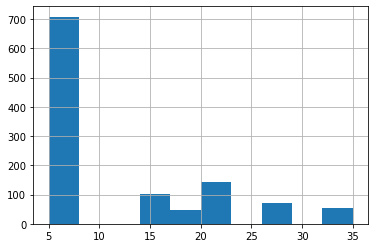

In [6]:
# Box Plot for understanding the distributions and to observe the outliers.

%matplotlib inline

# Histogram of variable ApplicantIncome

df['pantry_days'].hist()

<AxesSubplot:>

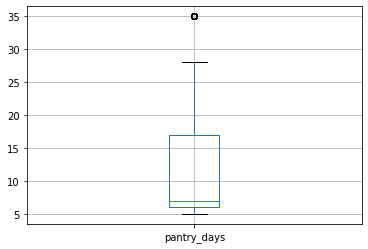

In [7]:
df.boxplot(column='pantry_days')

<AxesSubplot:title={'center':'pantry_days'}, xlabel='temp'>

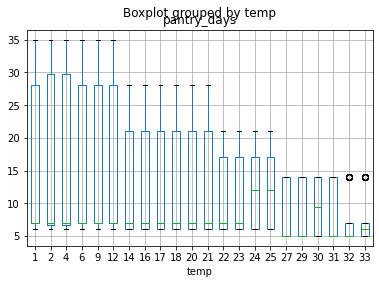

In [8]:
# Box Plot for variable pantry_days by variable temperature of training data set

df.boxplot(column='pantry_days', by = 'temp')

In [9]:
df.dtypes

perishable     object
pantry_days     int64
temp            int64
fridge_days     int64
dtype: object

In [10]:
''' 1    Milk
    4    Apple
    0    bread
    2    yoghurt
    3    Potato '''

' 1    Milk\n    4    Apple\n    0    bread\n    2    yoghurt\n    3    Potato '

In [11]:
df.perishable.value_counts()

Milk       252
Apple      246
bread      222
yoghurt    207
Potato     201
Name: perishable, dtype: int64

In [12]:
df['per_int'] = pd.factorize(df.perishable)[0]

In [13]:
df.head()

,perishable,pantry_days,temp,fridge_days,per_int
0,bread,5,27,7,0
1,bread,5,29,13,0
2,bread,5,30,7,0
3,bread,5,31,7,0
4,bread,5,32,8,0


In [14]:
df.per_int.value_counts()

1    252
4    246
0    222
2    207
3    201
Name: per_int, dtype: int64

## Model 1

In [15]:
x = df[['per_int','temp']]
y = df[["pantry_days"]]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [38]:
#Create Decision object
model = DecisionTreeClassifier(max_leaf_nodes=15,random_state = 1)

model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)



accuracy = metrics.accuracy_score(y_test,predicted)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy)) 

Accuracy : 83.628%


[Text(5418.541666666666, 5188.909090909091, 'X[0] <= 2.5\ngini = 0.829\nsamples = 902\nvalue = [127, 211, 229, 86, 40, 108, 60, 41]'),
 Text(3758.75, 4694.727272727273, 'X[1] <= 26.0\ngini = 0.652\nsamples = 544\nvalue = [127, 211, 206, 0, 0, 0, 0, 0]'),
 Text(3552.083333333333, 4200.545454545454, 'X[1] <= 21.5\ngini = 0.5\nsamples = 417\nvalue = [0, 211, 206, 0, 0, 0, 0, 0]'),
 Text(2402.5, 3706.363636363636, 'X[0] <= 0.5\ngini = 0.498\nsamples = 342\nvalue = [0, 160, 182, 0, 0, 0, 0, 0]'),
 Text(723.3333333333333, 3212.181818181818, 'X[1] <= 13.0\ngini = 0.458\nsamples = 121\nvalue = [0, 78, 43, 0, 0, 0, 0, 0]'),
 Text(516.6666666666666, 2718.0, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0, 0, 0, 0, 0, 0]'),
 Text(930.0, 2718.0, 'X[1] <= 16.5\ngini = 0.493\nsamples = 77\nvalue = [0, 34, 43, 0, 0, 0, 0, 0]'),
 Text(413.3333333333333, 2223.818181818182, 'X[1] <= 15.0\ngini = 0.48\nsamples = 25\nvalue = [0, 15, 10, 0, 0, 0, 0, 0]'),
 Text(206.66666666666666, 1729.6363636363635, 'gini = 

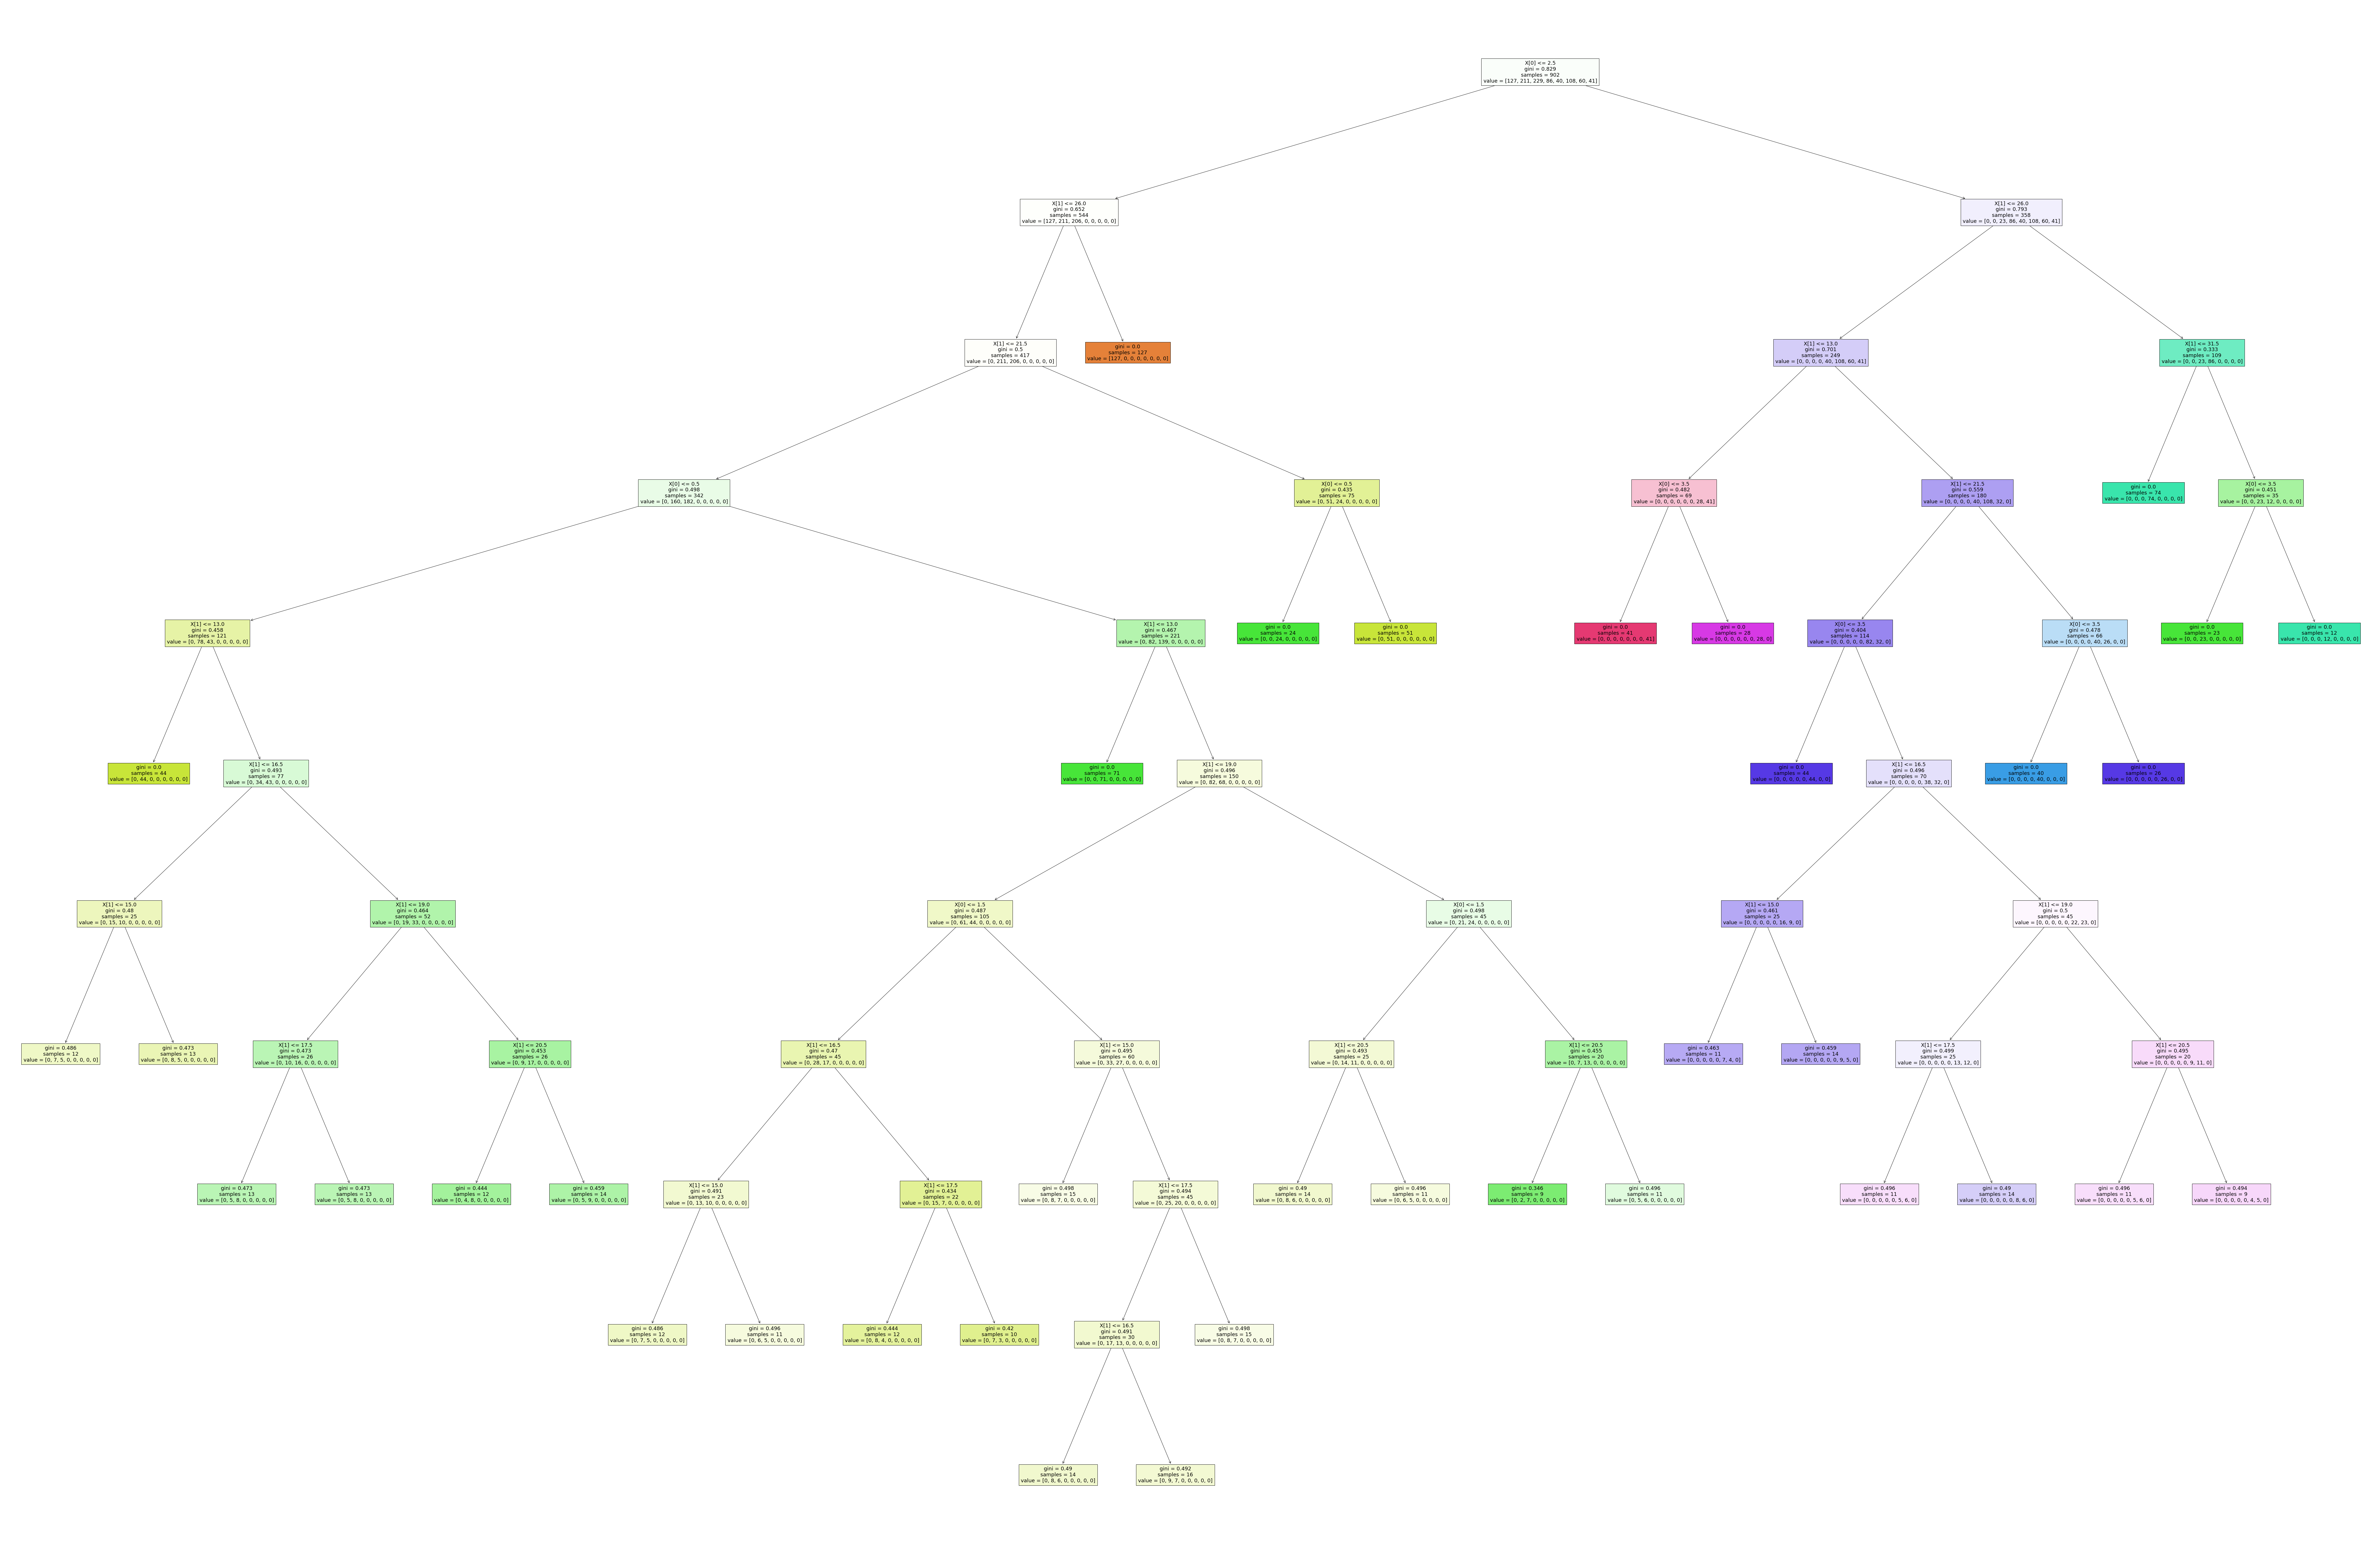

In [36]:
plt.figure(figsize=(150,100))
tree.plot_tree(model,filled=True)

In [17]:
'''#Create random forest object
model = RandomForestClassifier(random_state=9)

model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)



accuracy = metrics.accuracy_score(y_test,predicted)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))'''

'#Create random forest object\nmodel = RandomForestClassifier(random_state=9)\n\nmodel.fit(x_train, y_train)\n\n#Predict Output\npredicted= model.predict(x_test)\n\n\n\naccuracy = metrics.accuracy_score(y_test,predicted)\nprint ("Accuracy : %s" % "{0:.3%}".format(accuracy))'

In [18]:
'''#Create logistic regression object
model = LogisticRegression(random_state=1)

model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)



accuracy = metrics.accuracy_score(y_test,predicted)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))'''

'#Create logistic regression object\nmodel = LogisticRegression(random_state=1)\n\nmodel.fit(x_train, y_train)\n\n#Predict Output\npredicted= model.predict(x_test)\n\n\n\naccuracy = metrics.accuracy_score(y_test,predicted)\nprint ("Accuracy : %s" % "{0:.3%}".format(accuracy))'

In [19]:
''' 1    Milk
    4    Apple
    0    bread
    2    yoghurt
    3    Potato '''

food_name = 1
temperature = 27
model.predict([[food_name,temperature]])

array([5], dtype=int64)

## Model 2

In [20]:
a = df[['per_int','temp']]
b = df[["fridge_days"]]
a_train, a_test, b_train, b_test = train_test_split(a,b,test_size=0.20)

In [21]:
#Create Decision object
modell = DecisionTreeClassifier(max_leaf_nodes=35,random_state = 1)

modell.fit(a_train, b_train)

#Predict Output
predictedd= modell.predict(a_test)



accuracyy = metrics.accuracy_score(b_test,predictedd)
print ("Accuracy : %s" % "{0:.3%}".format(accuracyy)) 

Accuracy : 84.071%


In [22]:
'''#Create Decision object
model = RandomForestClassifier(random_state = 1)

model.fit(a_train, b_train)

#Predict Output
predicted= model.predict(a_test)



accuracy = metrics.accuracy_score(b_test,predicted)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))'''

'#Create Decision object\nmodel = RandomForestClassifier(random_state = 1)\n\nmodel.fit(a_train, b_train)\n\n#Predict Output\npredicted= model.predict(a_test)\n\n\n\naccuracy = metrics.accuracy_score(b_test,predicted)\nprint ("Accuracy : %s" % "{0:.3%}".format(accuracy))'

In [23]:
''' 1    Milk
    4    Apple
    0    bread
    2    yoghurt
    3    Potato 

food_name = 1
temperature = 27
modell.predict([[food_name,temperature]]) '''

' 1    Milk\n    4    Apple\n    0    bread\n    2    yoghurt\n    3    Potato \n\nfood_name = 1\ntemperature = 27\nmodell.predict([[food_name,temperature]]) '

In [24]:
'''date=ed
food = inc
'''

'date=ed\nfood = inc\n'

In [45]:
            t = None
            te = None
            month = 1
            food_type = 4
            country = 1
            storage = 2
            price= 12
            if storage == 1:
                if country == 1:
                    if month == 1:
                        t = 14
                    elif  month == 2:
                        t = 18
                    elif  month == 3:
                        t = 23
                    elif  month == 4:
                        t = 29
                    elif  month == 5:
                        t = 33
                    elif  month == 6:
                        t = 33
                    elif  month == 7:
                        t = 32
                    elif  month == 8:
                        t = 31
                    elif  month == 9:
                        t = 30
                    elif  month == 10:
                        t = 27
                    elif  month == 11:
                        t = 21
                    elif  month == 12:
                        t = 16
                    else:
                        pass
                elif country == 2:
                    if month == 1:
                        t = 1
                    elif  month == 2:
                        t = 2
                    elif  month == 3:
                        t = 6
                    elif  month == 4:
                        t = 12
                    elif  month == 5:
                        t = 17
                    elif  month == 6:
                        t = 22
                    elif  month == 7:
                        t = 25
                    elif  month == 8:
                        t = 24
                    elif  month == 9:
                        t = 20
                    elif  month == 10:
                        t = 14
                    elif  month == 11:
                        t = 9
                    elif  month == 12:
                        t = 4
                    else:
                        pass
            if storage == 2:                    
                if country == 1:
                    if month == 1:
                        te = 14
                    elif  month == 2:
                        te = 18
                    elif  month == 3:
                        te = 23
                    elif  month == 4:
                        te = 29
                    elif  month == 5:
                        te = 33
                    elif  month == 6:
                        te = 33
                    elif  month == 7:
                        te = 32
                    elif  month == 8:
                        te = 31
                    elif  month == 9:
                        te = 30
                    elif  month == 10:
                        te = 27
                    elif  month == 11:
                        te = 21
                    elif  month == 12:
                        te = 16
                    else:
                        pass
                elif country == 2:
                    if month == 1:
                        te = 1
                    elif  month == 2:
                        te = 2
                    elif  month == 3:
                        te = 6
                    elif  month == 4:
                        te = 12
                    elif  month == 5:
                        te = 17
                    elif  month == 6:
                        te = 22
                    elif  month == 7:
                        te = 25
                    elif  month == 8:
                        te = 24
                    elif  month == 9:
                        te = 20
                    elif  month == 10:
                        te = 14
                    elif  month == 11:
                        te = 9
                    elif  month == 12:
                        te = 4
                    else:
                        pass                
            
            new_per_int = food_type
            try:
                temperature = t
                prediction_res=(model.predict([[new_per_int,temperature]]))
                pa = int(prediction_res)
                print(pa,"days")
            except:
                temperature2 = te
                prediction_res2=(modell.predict([[new_per_int,temperature2]]))
                pa = int(prediction_res2)
                print(pa,"days")
            
            

30 days


In [46]:
if pa >= 15:
    i = 1
    while i < pa:
        price = price - (0.08*price)**pa
        print("$ {0:.2f}".format(price))
        i = i + 1
        
elif pa < 15:
    i = 1
    while i < pa:
        price = price - (0.09*price)**pa
        print("$ {0:.2f}".format(price))
        i = i + 1
else:
    pass

$ 11.71
$ 11.57
$ 11.47
$ 11.39
$ 11.33
$ 11.28
$ 11.23
$ 11.19
$ 11.16
$ 11.12
$ 11.09
$ 11.07
$ 11.04
$ 11.02
$ 10.99
$ 10.97
$ 10.95
$ 10.93
$ 10.91
$ 10.90
$ 10.88
$ 10.87
$ 10.85
$ 10.84
$ 10.82
$ 10.81
$ 10.80
$ 10.78
$ 10.77


In [77]:
v = 12.45547
print("days",v)

#print("$ {0:.2f}".format(h))

days 12.45547


In [47]:
pa = 6
price = 14
if pa >= 15:
    i = 1
    while i < pa:
        price = price - (0.08*price)**pa
        print("$ {0:.2f}".format(price))
        i = i + 1
        
elif pa < 15:
    i = 1
    while i < pa:
        price = price - (0.09*price)**pa
        print("$ {0:.2f}".format(price))
        i = i + 1
else:
    pass


$ 10.00
$ 9.47
$ 9.08
$ 8.79
$ 8.54


In [43]:
pa = 30
price = 10
price = round((0.06*price)**pa,2)

print(price)

0.0


In [ ]:
'''
def f1():
    month = int(root_entinc.get())
    food_type = int(root_entcred.get())
    country = int(root_ented.get())
    storage =int(root_entgender.get())
    
    if root_entinc.get().isalpha():
        showerror("Failure", "invalid entry")
        root_entinc.delete(0, END)
    elif root_entcred.get().isalpha():
        showerror("Failure", "invalid entry")
        root_entcred.delete(0, END)
    elif root_ented.get().isalpha():
        showerror("Failure", "invalid entry")
        root_entcred.delete(0, END)
    elif root_entgender.get().isalpha():
        showerror("Failure", "invalid entry")
        root_entcred.delete(0, END)
    else:
        try:
            if country == 1:
                if storage == 1:
                    if month == 1:
                        t = 14
                    elif  month == 2:
                        t = 18
                    elif  month == 3:
                        t = 23
                    elif  month == 4:
                        t = 29
                    elif  month == 5:
                        t = 33
                    elif  month == 6:
                        t = 33
                    elif  month == 7:
                        t = 32
                    elif  month == 8:
                        t = 31
                    elif  month == 9:
                        t = 30
                    elif  month == 10:
                        t = 27
                    elif  month == 11:
                        t = 21
                    elif  month == 12:
                        t = 16
                    else:
                        pass
                elif country == 2:
                    if month == 1:
                        t = 1
                    elif  month == 2:
                        t = 2
                    elif  month == 3:
                        t = 6
                    elif  month == 4:
                        t = 12
                    elif  month == 5:
                        t = 17
                    elif  month == 6:
                        t = 22
                    elif  month == 7:
                        t = 25
                    elif  month == 8:
                        t = 24
                    elif  month == 9:
                        t = 20
                    elif  month == 10:
                        t = 14
                    elif  month == 11:
                        t = 9
                    elif  month == 12:
                        t = 4
                    else:
                        pass
            if country == 1:                    
                if storage == 2:
                    if month == 1:
                        t = 14
                    elif  month == 2:
                        t = 18
                    elif  month == 3:
                        t = 23
                    elif  month == 4:
                        t = 29
                    elif  month == 5:
                        t = 33
                    elif  month == 6:
                        t = 33
                    elif  month == 7:
                        t = 32
                    elif  month == 8:
                        t = 31
                    elif  month == 9:
                        t = 30
                    elif  month == 10:
                        t = 27
                    elif  month == 11:
                        t = 21
                    elif  month == 12:
                        t = 16
                    else:
                        pass
                elif country == 2:
                    if month == 1:
                        t = 1
                    elif  month == 2:
                        t = 2
                    elif  month == 3:
                        t = 6
                    elif  month == 4:
                        t = 12
                    elif  month == 5:
                        t = 17
                    elif  month == 6:
                        t = 22
                    elif  month == 7:
                        t = 25
                    elif  month == 8:
                        t = 24
                    elif  month == 9:
                        t = 20
                    elif  month == 10:
                        t = 14
                    elif  month == 11:
                        t = 9
                    elif  month == 12:
                        t = 4
                    else:
                        pass                
            
            new_per_int = food_type
            temperature = t
            
            prediction_res=(model.predict([[new_per_int,temperature]]))
            
        except Exception as e:
            showerror("Failure", "Delete Issue "+str(e))
        finally:
            if prediction_res[0] == "Y":
                showinfo("eligibility", "Eligible")  
            else:
                showinfo("eligibility", "Not Eligible") 
def f2():
    root.destroy()
    
    
root = Tk()
root.title("PF")
root.geometry("1080x1080+220+0")
root.configure(bg='Lightblue1')
root.resizable(0, 0) 




'''root_lblid = Label(root, text="Enter Loan_ID: ", font=('BELL MT', 10, 'bold'), bg='Lightskyblue1')
root_entid = Entry(root, bd=5, font=('BELL MT', 10, 'bold'))
root_lblgender = Label(root, text="Enter Gender:(m/f)", font=('BELL MT', 10, 'bold'), bg='Lightskyblue1')
root_entgender = Entry(root, bd=5, font=('BELL MT', 10, 'bold'))
root_lblmarried = Label(root, text="Married:(y/n)", font=('BELL MT', 10, 'bold'), bg='Lightskyblue1')
root_entmarried = Entry(root, bd=5, font=('BELL MT', 10, 'bold'))'''

root_lblgender = Label(root, text="Storage", font=('BELL MT', 10, 'bold'), bg='Lightskyblue1')
root_entgender = Entry(root, bd=5, font=('BELL MT', 10, 'bold'))

root_lbled = Label(root, text="Country: ", font=('BELL MT', 10, 'bold'), bg='Lightskyblue1')
root_ented = Entry(root, bd=5, font=('BELL MT', 10, 'bold'))

root_lblinc = Label(root, text="Month: ", font=('BELL MT', 10, 'bold'), bg='Lightskyblue1')
root_entinc = Entry(root, bd=5, font=('BELL MT', 10, 'bold'))

root_lblcred = Label(root, text="Food Type: ", font=('BELL MT', 10, 'bold'), bg='Lightskyblue1')
root_entcred = Entry(root, bd=5, font=('BELL MT', 10, 'bold'))

btncheck = Button(root, text="CHECK", width=10, font=('courier', 10, 'bold'), command=f1)
btnclose = Button(root, text="CLOSE", width=10, font=('courier', 10, 'bold'), command=f2) 
#root.destroy


root_lblid.pack(pady=10) 
root_entid.pack(pady=10) 
root_lblgender.pack(pady=10)
root_entgender.pack(pady=10) 
root_lblmarried.pack(pady=10) 
root_entmarried.pack(pady=10)
root_lbled.pack(pady=10) 
root_ented.pack(pady=10) 
root_lblse.pack(pady=10)
root_entse.pack(pady=10)
root_lblinc.pack(pady=10) 
root_entinc.pack(pady=10) 
root_lblcred.pack(pady=10) 
root_entcred.pack(pady=10) 
btncheck.pack(pady=10) 
btnclose.pack(pady=10)
root.mainloop()    '''